### Student Information
Name:尹沛綸

Student ID:111304012

GitHub ID:arica-ee

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

In [92]:
### Begin Assignment Here

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import helpers.data_mining_helpers as dmh
import nltk
import math
nltk.download("punkt")
nltk.download("punkt_tab")


# 讀取資料
data = pd.read_csv("/Users/sandyyin/Desktop/Data_Mining/DM2025Labs/DM2025-Lab1-Exercise/newdataset/Reddit-stock-sentiment.csv")

""" Data Preprocessing """

# 確認資料缺失狀況->downvotes, upvote_ratio初步看蠻多缺失 -> 不太會用到
print(data.isnull().sum())

# 確認text是否有空值/異常值但沒被檢查到(text < 10) -> 大致確認都算正常 -> 刪掉少數亂碼（包含/$, 大概4rows）
print("Detect for the strange text values:")
print(data[data["text"].apply(lambda x: len(x) < 10)])
data = data[~((data["text"].apply(lambda x: len(x) < 10)) & (data["text"].str.contains("/|\$", regex = True)))]
data.isnull().apply(lambda x: dmh.check_missing_values(x), axis = 1)

# 確認是否有重複row，以及重複row的情況
duplicated_rows = data[data.duplicated(subset = ["author", "text"], keep=False)] # 初步觀察重複row很少，且並非大量重複張貼/廣告等，所以先保留
duplicated_rows.head(3)

# 計算text字數
data["text_length"] = data["text"].apply(lambda x: len(x.split(" ")))

type              0
datetime          0
post_id           0
subreddit         0
title             0
author            0
url               0
upvotes           0
downvotes       783
upvote_ratio    783
text              0
subjectivity      0
polarity          0
sentiment         0
entities          0
label             0
dtype: int64
Detect for the strange text values:
        type             datetime  post_id         subreddit  \
21   comment  2025-04-06 23:31:33  mls3ha1  stockstobuytoday   
37   comment   2025-03-04 0:43:03  mfvnxnj            stocks   
41   comment  2021-05-03 22:17:48  gwu560b  stockstobuytoday   
55   comment  2025-04-11 16:00:46  mml01xt            stocks   
109  comment  2025-04-10 14:34:18  mme7ouv       StockMarket   
139  comment   2022-03-31 3:31:17  i2sz1ij  stockstobuytoday   
155  comment  2021-10-27 18:38:43  hia34bn  stockstobuytoday   
166  comment   2021-01-31 2:02:38  glfo07v  stockstobuytoday   
170  comment   2025-04-12 2:32:17  mmo6k32    wallstree

[nltk_data] Downloading package punkt to /Users/sandyyin/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/sandyyin/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [90]:
""" EDA """

from plotly.subplots import make_subplots

figure = make_subplots(rows = 1, cols = 3, subplot_titles = ("Sentiment Counts", "Text Length Distribution", "Text Length and Sentiment Correlation"))

# sentiment & type 資料分布-> 平均，comment較多，負向情緒偏少，post幾乎沒有負向樣本
stack_data = data.groupby(["sentiment", "type"]).size().unstack()

color = ["green", "blue"]

cols = stack_data.columns[::-1]

for i, col in enumerate(cols):
    figure.add_trace(
        go.Bar(
            x = stack_data.index,
            y = stack_data[col],
            name = str(col),
            marker_color = color[i]
        ),
        row = 1, col = 1
    )

figure.update_layout(barmode = "stack", showlegend = False)  # 設定為堆疊長條圖

# 留言長度分布 -> 中位數14, Q3:29，主要以30字以內的字數為主
figure.add_trace(
    go.Box(x = data['text_length']), row=1, col=2)

# 留言長度與情緒關聯 -> 沒什麼關聯
data["text_length_group"] = np.select(
    [data["text_length"] <= 20, data["text_length"] <= 50, data["text_length"] <= 100, data["text_length"] > 100],
    ["Short (<20)", "Medium (21~50)", "Long (51~100)", "Longer (>100)"], default = ""
)

heat_table = data.pivot_table(
    index = "sentiment",
    columns = "text_length_group",
    aggfunc = "size",
    fill_value = 0
)

order = ["Short (<20)", "Medium (21~50)", "Long (51~100)", "Longer (>100)"]
heat_table = heat_table[order]

figure.add_trace(
    go.Heatmap(x = heat_table.columns, y= heat_table.index, z = heat_table.values), row = 1, col = 3)

figure.show()

['Calls', 'on', 'retards']


' 偏平均的 : just, market, trump .... '

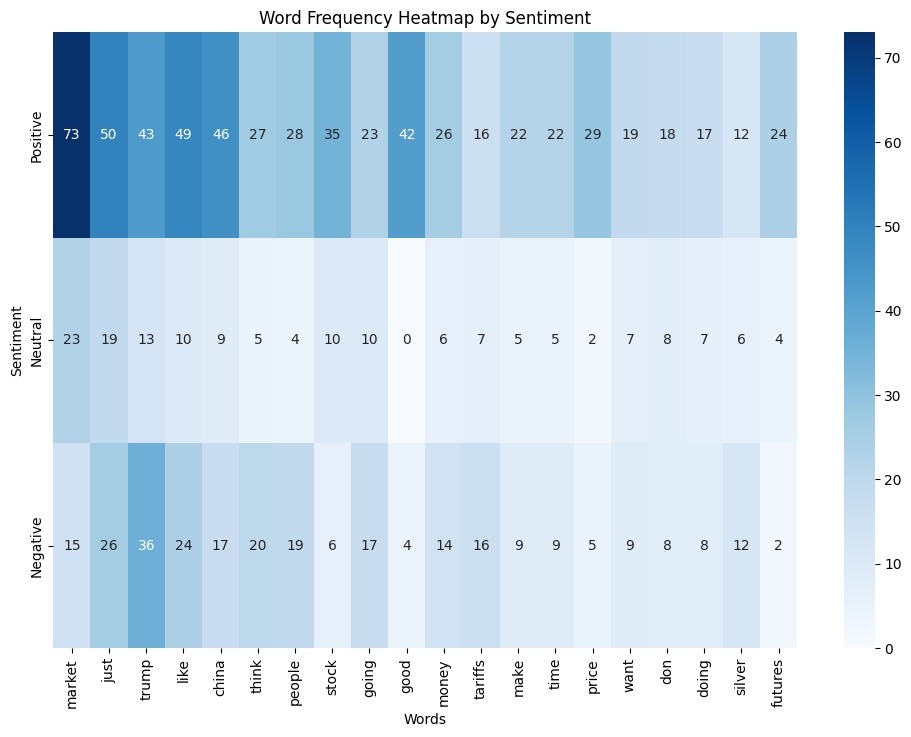

In [128]:
""" Text Mining-1 """
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(stop_words = "english") # 後續會刪掉英文停用詞

# 把字拆開
data["split_words"] = data["text"].apply(lambda x: dmh.tokenize_text(x))
print(data["split_words"][0]) # 印出第一筆資料的拆字結果看看

# 創建一個詞頻矩陣（已去掉英文停用詞）
text_count = count_vect.fit_transform(data["text"])
text_list = count_vect.get_feature_names_out()
text_app_mapping_table = pd.DataFrame(text_count.toarray(), columns = text_list, index = data.index)

# # 看看矩陣大小
# print(text_app_mapping_table.shape)
# print(text_app_mapping_table.head(3))

plt.subplots(figsize = (12, 8))

# 畫出三種heatmap呈現詞頻最高的字
positive_index = data[data["sentiment"] == 1].index
neutral_index = data[data["sentiment"] == 0].index
negative_index = data[data["sentiment"] == -1].index

index_list = [positive_index, neutral_index, negative_index]
sentiment_list = ["Positive", "Neutral", "Negative"]

top_words = text_app_mapping_table.sum().sort_values(ascending = False).head(20).index

heat_data = pd.DataFrame(index = ["Positive", "Neutral", "Negative"], columns = top_words)

for sentiment, idx in zip(sentiment_list, index_list):
    heat_data.loc[sentiment] = text_app_mapping_table.loc[idx, top_words].sum()

sns.heatmap(heat_data.astype(float), annot = True, cmap = "Blues")
plt.title("Word Frequency Heatmap by Sentiment")
plt.xlabel("Words")
plt.ylabel("Sentiment")

""" 可以發現到有些字比較極端（大部分出現在正面/負面，少出現在中性文章） """
""" 比方說 都偏正面的字：good, futures, stock, price """
""" 偏平均的 : just, market, trump .... """

/var/folders/04/2gl427fj70327xl4vnc_xs580000gn/T/ipykernel_87969/1709846260.py:20: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/var/folders/04/2gl427fj70327xl4vnc_xs580000gn/T/ipykernel_87969/1709846260.py:20: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/var/folders/04/2gl427fj70327xl4vnc_xs580000gn/T/ipykernel_87969/1709846260.py:20: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



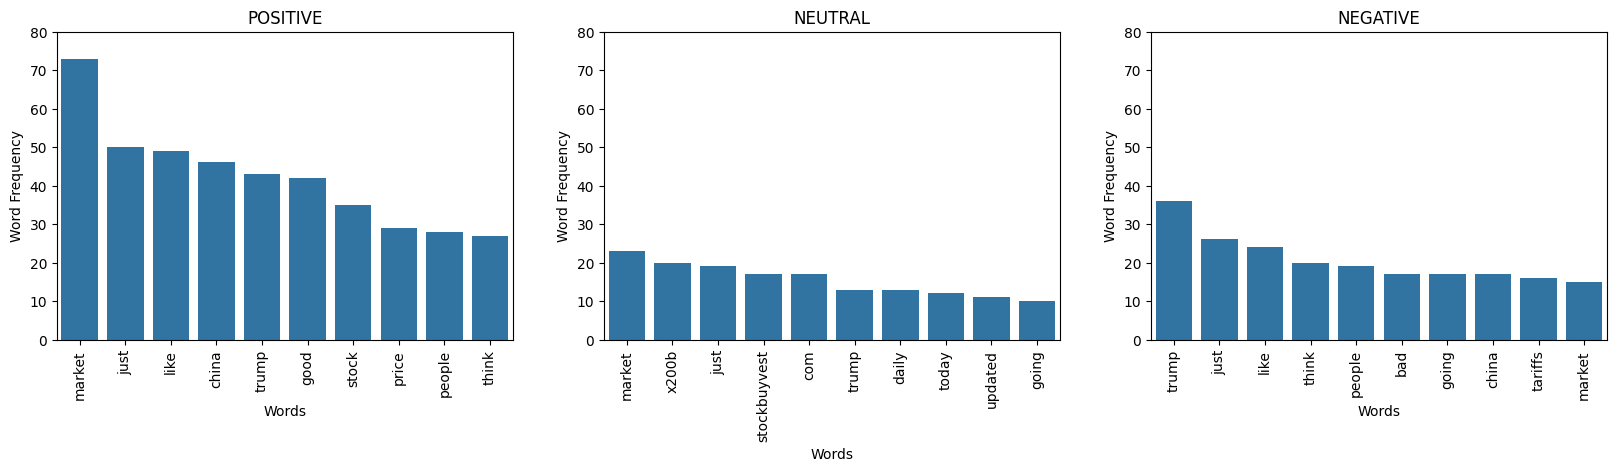

' \n一些insight：\nmarket, good是很正向的關鍵詞\n出現china的評論大部分不是正向就是負向（很少中立的）\n'

In [129]:
""" Text Mining-2 """

# 再分別畫出每個類別字頻最高的字
fig, axes = plt.subplots(1, 3, figsize = (20, 4))

positive_data = text_app_mapping_table.loc[positive_index]
neutral_data = text_app_mapping_table.loc[neutral_index]
negative_data = text_app_mapping_table.loc[negative_index]

# 抓出每個類別出現頻率前十高的字
positive_top_words = positive_data.sum().sort_values(ascending = False).head(10)
neutral_top_words = neutral_data.sum().sort_values(ascending = False).head(10)
negative_top_words = negative_data.sum().sort_values(ascending = False).head(10)

data_list = [positive_top_words, neutral_top_words, negative_top_words]
title_list = ["POSITIVE", "NEUTRAL", "NEGATIVE"]

for axes, df, tl in zip(axes, data_list, title_list):
    sns.barplot(x = df.index, y = df.values, ax = axes)
    axes.set_xticklabels(df.index, rotation = 90)
    axes.set_title(tl)
    axes.set_ylabel("Word Frequency")
    axes.set_xlabel("Words")
    axes.set_ylim(0, 80)

plt.show()

""" 
一些insight：
market, good是很正向的關鍵詞
出現china的評論大部分不是正向就是負向（很少中立的）
"""

In [138]:
# 看看詞頻raw data是否也存在長尾效應 -> 還是有
sum_table = text_app_mapping_table.sum().sort_values(ascending = False)

combined_dict = sum_table.sort_values(ascending = False)

fig = px.histogram(
    x = combined_dict.index[:1000], 
    y = combined_dict.values[:1000],
    title = "Frequence of Terms")

fig.show()

# 嘗試透過加上log改善視覺化成果 -> 有改善
sum_table_log = np.log1p(sum_table) 

combined_dict_log = sum_table_log.sort_values(ascending = False)

fig = px.histogram(
    x = combined_dict_log.index[:1000], 
    y = combined_dict_log.values[:1000],
    title = "(LOG) Frequence of Terms")

fig.show()

# Phase 2

In [ ]:
### Begin Assignment Here